In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline 

In [4]:
df=pd.read_excel('Book1.xlsx')

In [5]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
df.groupby('Species').mean()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
Roach,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850
Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.1+ KB


# EDA

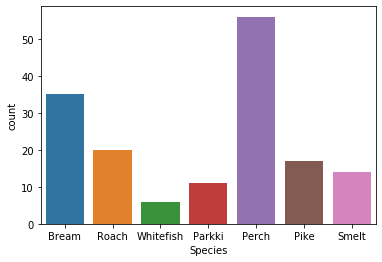

In [12]:
sns.countplot(x='Species',data=df)

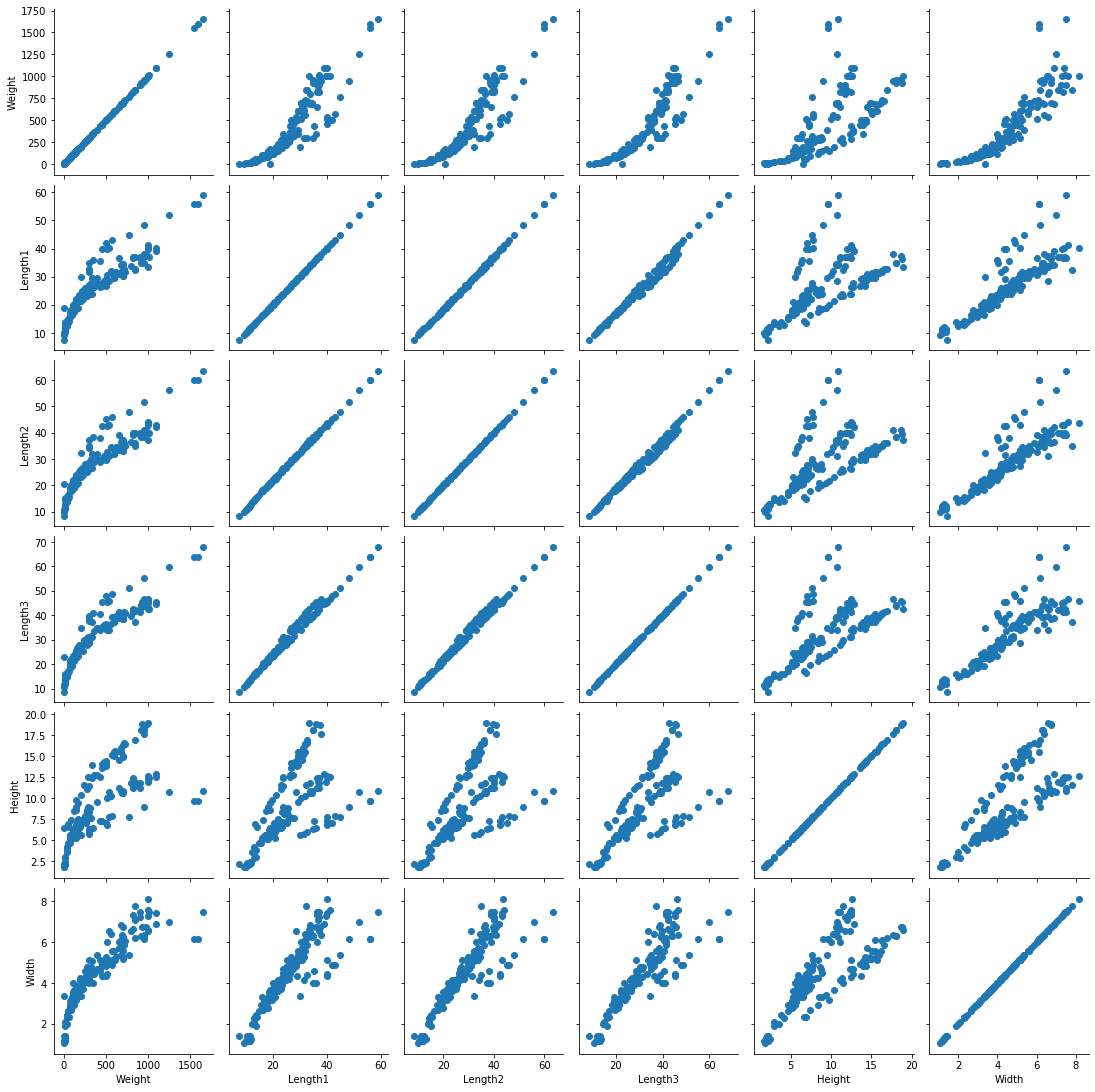

In [13]:
# Then you map to the grid
g = sns.PairGrid(df)
g.map(plt.scatter)

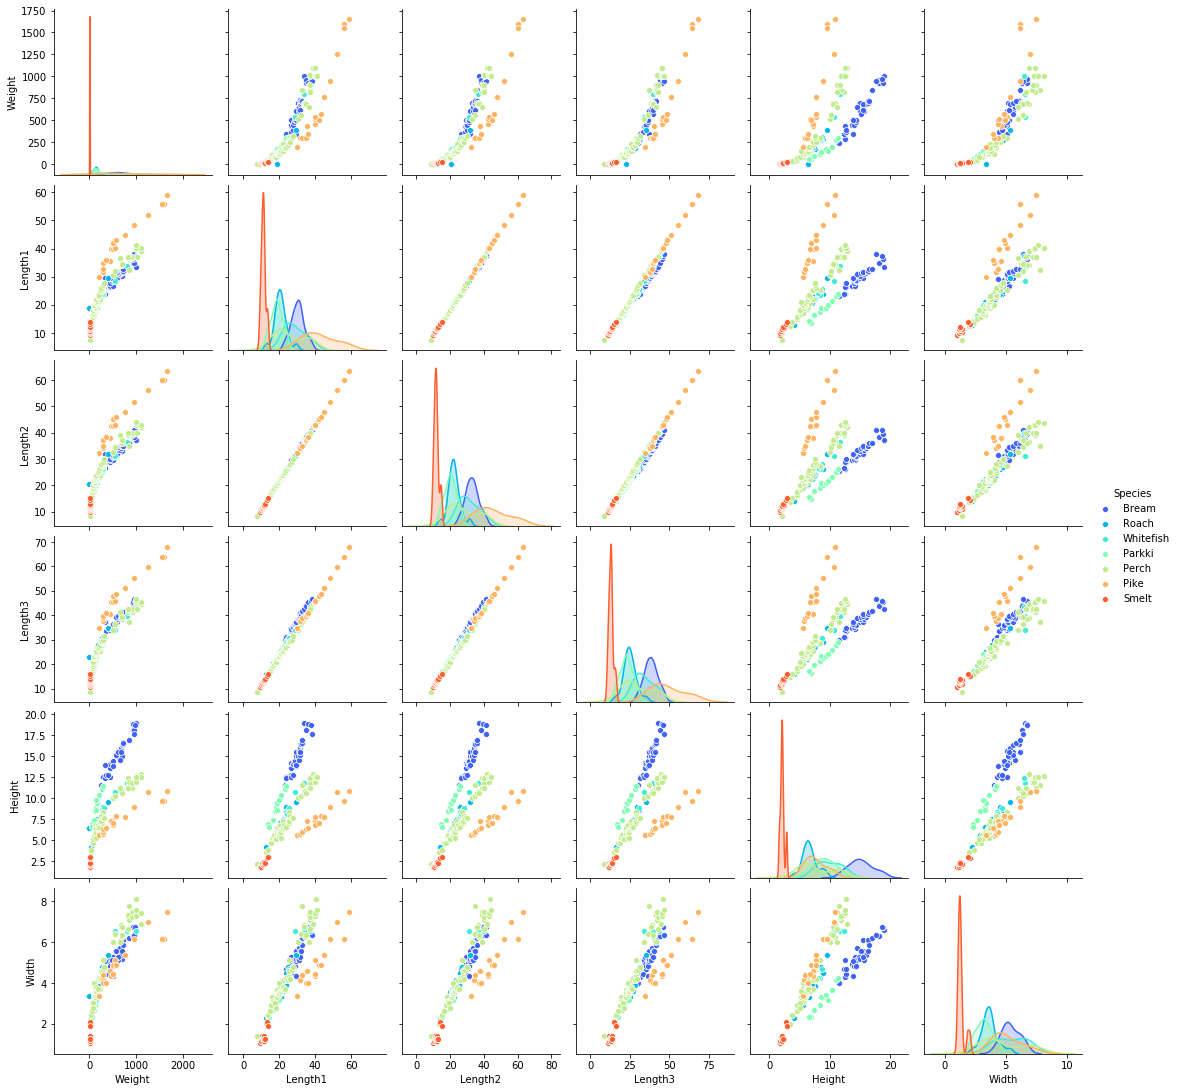

In [14]:
sns.pairplot(df,hue='Species',palette='rainbow')

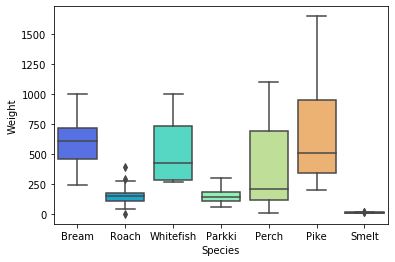

In [17]:
sns.boxplot(x='Species',y='Weight',data=df,palette='rainbow')

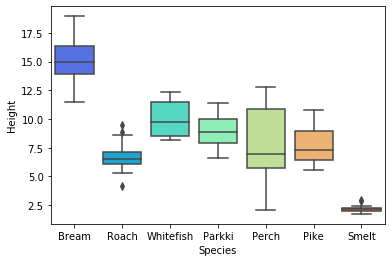

In [18]:
sns.boxplot(x='Species',y='Height',data=df,palette='rainbow')

SyntaxError: invalid syntax (<ipython-input-9-d24ff68dafad>, line 1)

# data refining

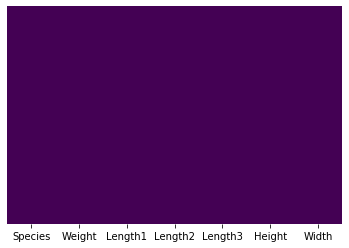

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
#no missing value

# Standardizing the features and PCA


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [16]:
scaler = StandardScaler()
scaler.fit(df[['Weight', 'Length1', 'Length2', 'Length3', 'Height','Width']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
scaled_data = scaler.transform(df[['Weight', 'Length1', 'Length2', 'Length3', 'Height','Width']])

In [18]:
scaled_df=pd.DataFrame(scaled_data,columns=['Weight', 'Length1', 'Length2', 'Length3', 'Height','Width'])

In [20]:
scaled_df['Species']=df['Species']

In [22]:
scaled_df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529,Bream
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579,Bream
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793,Bream
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621,Bream
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371,Bream


# splitting the data

In [23]:
from sklearn.model_selection import train_test_split

In [31]:
X=scaled_df[['Weight', 'Length1', 'Length2', 'Length3', 'Height','Width']]
y=scaled_df['Species']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# fitting decision tree

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
rfc_pred = rfc.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
print(confusion_matrix(y_test,rfc_pred))

[[14  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0 13  0  5  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  3  0  1  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  1  0  2  0  0]]


In [39]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        14
      Parkki       1.00      1.00      1.00         3
       Perch       0.76      0.72      0.74        18
        Pike       1.00      1.00      1.00         5
       Roach       0.12      0.25      0.17         4
       Smelt       1.00      1.00      1.00         6
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.79        53
   macro avg       0.70      0.71      0.70        53
weighted avg       0.80      0.79      0.79        53



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# fitting SVM 

In [40]:
from sklearn.svm import SVC

In [41]:
model = SVC()

In [42]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
predictions = model.predict(X_test)

In [44]:
print(confusion_matrix(y_test,predictions))

[[14  0  0  0  0  0  0]
 [ 0  2  1  0  0  0  0]
 [ 0  0 18  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  4  0  0  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  3  0  0  0  0]]


In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        14
      Parkki       1.00      0.67      0.80         3
       Perch       0.69      1.00      0.82        18
        Pike       1.00      1.00      1.00         5
       Roach       0.00      0.00      0.00         4
       Smelt       1.00      1.00      1.00         6
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.85        53
   macro avg       0.67      0.67      0.66        53
weighted avg       0.76      0.85      0.79        53



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Grid Search for SVM

In [46]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [49]:
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.378, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.361, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.364, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.351, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.361, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.364, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.788, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.703, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.750, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.697, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [50]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [51]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
grid_predictions = grid.predict(X_test)

In [53]:
print(confusion_matrix(y_test,grid_predictions))

[[14  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0 18  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  1  0  2  0  0]]


In [54]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        14
      Parkki       1.00      1.00      1.00         3
       Perch       0.95      1.00      0.97        18
        Pike       1.00      1.00      1.00         5
       Roach       0.67      1.00      0.80         4
       Smelt       1.00      1.00      1.00         6
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.94        53
   macro avg       0.80      0.86      0.82        53
weighted avg       0.90      0.94      0.92        53



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
